**Autor:** [Boris Timko](mailto:5346398@upjs.sk)

**Podporné materiály k bakalárskej práci <i>VLASTNOSTI A VYUŽITIE STOCHASTICKEJ
DOMINANCIE</i>**

***

<br>

**<font size=10 color=brown> FSD a SSD pri diskrétnom rozdelení</font>**

<br>
---


Obsah tohto Jupyter notebooku bol spracovaný na základe dokumentu:  
📄 **[Stochastic Dominance – Optimalizace II, MFF UK](https://www2.karlin.mff.cuni.cz/~branda/download/06_Opti2_Stochastic_dominance.pdf)**  

Tento notebook slúži ako ilustrovaný sprievodca konceptami **prvej a druhej stochastickej dominancie (FSD, SSD)**, s praktickými príkladmi, grafmi a numerickými výpočtami.

---

<!--
<a id=table_of_contents></a>
##  Obsah
* [Algoritmus simulácie diskrétneho Markovovho reťazca](#algo)
* [Problém vysokoškoláka športovca](#sportstudy)

<font size=3>Pre návrat na obsah stlačte klávesu Home.</font>
--- -->

In [ ]:
# nacitanie balikov
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

***
<a id=fsdssd><a>
## FSD a SSD pri diskrétnom rozdelení
<blockquote>
Zvážme náhodný vektor výnosov $(R_1, R_2)$ s distribučnými funkciami

$
F_{R_i}(x) = P(R_i \leq x),
$

a tzv. integrál distribučnej funkcie

$
F^{(2)}_{R_i}(x) = \int_{-\infty}^{x} F_{R_i}(\nu)\, d\nu = \mathbb{E}[(x - R_i)^+].
$

Potom:

1. FSD dominancia: $R_1 \prec_{FSD} R_2$ práve vtedy, keď $F_{R_1}(x) \geq F_{R_2}(x)$ pre všetky $x$, pričom aspoň pre jedno $x$ platí prísna nerovnosť.

2. SSD dominancia: $R_1 \prec_{SSD} R_2$ práve vtedy, keď $F^{(2)}_{R_1}(x) \geq F^{(2)}_{R_2}(x)$ pre všetky $x$, pričom aspoň pre jedno $x$ platí prísna nerovnosť.

---

Uvažujme náhodný vektor výnosov $(R_1, R_2)$ s diskrétnym rozdelením a rovnomerne pravdepodobnými realizáciami $(r_{1s}, r_{2s}),\ s=1,\dots,S$.

0. Utrieďme realizácie pre každé aktívum, teda:

$
r_{1[1]} < r_{1[2]} < \cdots < r_{1[S]}, \quad r_{2[1]} < r_{2[2]} < \cdots < r_{2[S]}.
$

1. FSD dominancia: $R_1 \prec_{FSD} R_2$ práve vtedy, keď $r_{1[s]} \leq r_{2[s]}$ pre všetky $s = 1,\dots,S$, pričom aspoň pre jedno $s$ prísna nerovnosť.

2. SSD dominancia: $R_1 \prec_{SSD} R_2$ práve vtedy, keď

$
\sum_{s=1}^{t} r_{1[s]} \leq \sum_{s=1}^{t} r_{2[s]} \quad \text{pre všetky } t = 1,\dots,S,
$

pričom aspoň pre jedno $t$ prísna nerovnosť.
</blockquote>


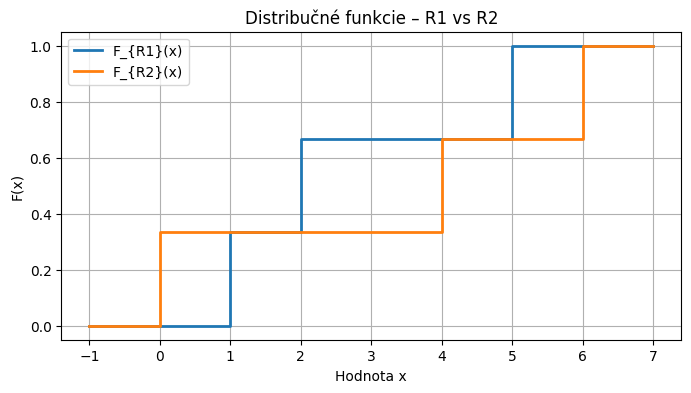

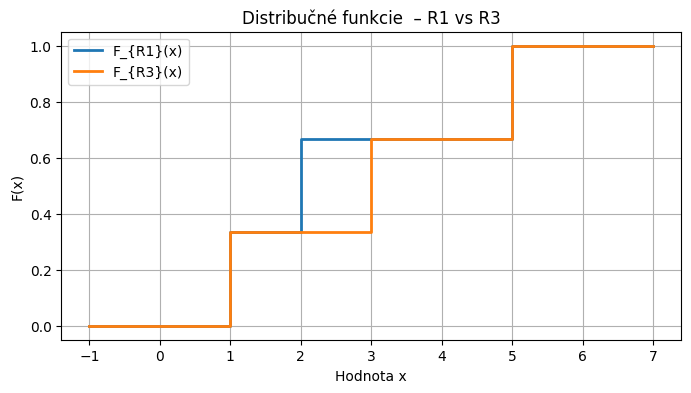

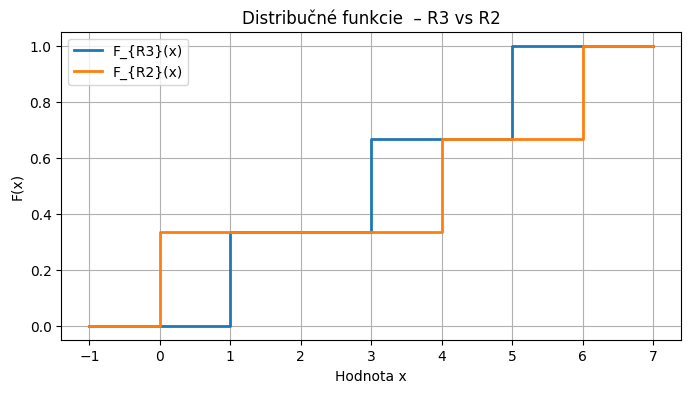

In [ ]:
# Výnosy a pravdepodobnosti pre R1, R2, R3
r1_vynosy = [2, 1, 5]
r1_pravd = [1/3, 1/3, 1/3]

r2_vynosy = [0, 6, 4]
r2_pravd = [1/3, 1/3, 1/3]

r3_vynosy = [1, 3, 5]
r3_pravd = [1/3, 1/3, 1/3]

# Hodnoty osí x (pre ktoré počítame CDF)
vsetky_vynosy = np.array(r1_vynosy + r2_vynosy + r3_vynosy)
hodnoty_x = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)


# Funkcia na výpočet  distribučnej funkcie (CDF)
def vypocitaj_cdf(x_hodnoty, vynosy, pravdepodobnosti):
    cdf = []
    for x in x_hodnoty:
        cdf_hodnota = sum(p for v, p in zip(vynosy, pravdepodobnosti) if v <= x)
        cdf.append(cdf_hodnota)
    return cdf

# Výpočet CDF pre všetky aktíva
cdf_r1 = vypocitaj_cdf(hodnoty_x, r1_vynosy, r1_pravd)
cdf_r2 = vypocitaj_cdf(hodnoty_x, r2_vynosy, r2_pravd)
cdf_r3 = vypocitaj_cdf(hodnoty_x, r3_vynosy, r3_pravd)

# Graf: R1 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='F_{R1}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='F_{R2}(x)', linewidth=2)
plt.title("Distribučné funkcie – R1 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R1 vs R3
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='F_{R1}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r3, where='post', label='F_{R3}(x)', linewidth=2)
plt.title("Distribučné funkcie  – R1 vs R3")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R3 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r3, where='post', label='F_{R3}(x)', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='F_{R2}(x)', linewidth=2)
plt.title("Distribučné funkcie  – R3 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()


---

##  Analýza FSD medzi $R_1$, $R_2$ a $R_3$

Máme tri aktíva s rovnomernými rozdeleniami:

- $R_1 = \{2, 1, 5\}$  
- $R_2 = \{0, 6, 4\}$  
- $R_3 = \{1, 3, 5\}$  
(všetky s pravdepodobnosťami $\frac{1}{3}$)

---

###  Prvá stochastická dominancia (FSD)

Pravidlo FSD:

$$
R_1 \prec_{FSD} R_2 \quad \text{ak a len ak} \quad F_{R_1}(x) \geq F_{R_2}(x) \quad \text{pre všetky } x, \text{ s aspoň jednou prísnou nerovnosťou}
$$

---

### Pozorovanie z grafov:

#### 1. **R₁ vs R₂**
Grafy $F_{R_1}(x)$ a $F_{R_2}(x)$ sa **pretínajú**.
- Niekde je $F_{R_1}(x)$ vyšší, inde je vyšší $F_{R_2}(x)$.

#### 2. **R₁ vs R₃**
Grafy $F_{R_1}(x)$ a $F_{R_3}(x)$ sa **pretínajú**, ale  
$F_{R_3}(x) \geq F_{R_1}(x)$, pričom na niektorých úsekoch platí  
$F_{R_3}(x) > F_{R_1}(x)$.



#### 3. **R₂ vs R₃**

Grafy $F_{R_2}(x)$ a $F_{R_3}(x)$ sa **pretínajú**.
- Niekde je$F_{R_2}(x)$ vyšší, inde je vyšší $F_{R_3}(x)$.
---

##  Porovnanie výnosov podľa zoradených realizácií

Pretože realizácie sú **rovnomerne pravdepodobné**, môžeme priamo aplikovať pravidlá pre FSD a SSD dominanciu pomocou zoradených hodnôt.

---

###  Zoradené realizácie:
Zoradili sme jednotlivé výnosy $R_1$, $R_2$ a $R_3$ od najmenšieho po najväčší. Následne sme spočítali súčty, čo umožňuje testovať FSD a SSD dominanciu.

Môžme z tabuľky vidieť že jedina FSD je $R_1 \prec_{FSD} R_3$ a taktiež jedniná SSD je $R_1 \prec_{SSD} R_3$
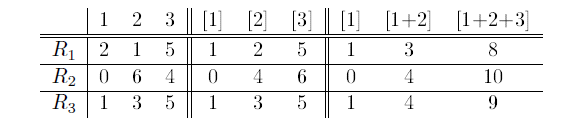

---

### Záver:

- $R_1 \prec_{FSD} R_3$
- $R_1 \prec_{SSD} R_3$

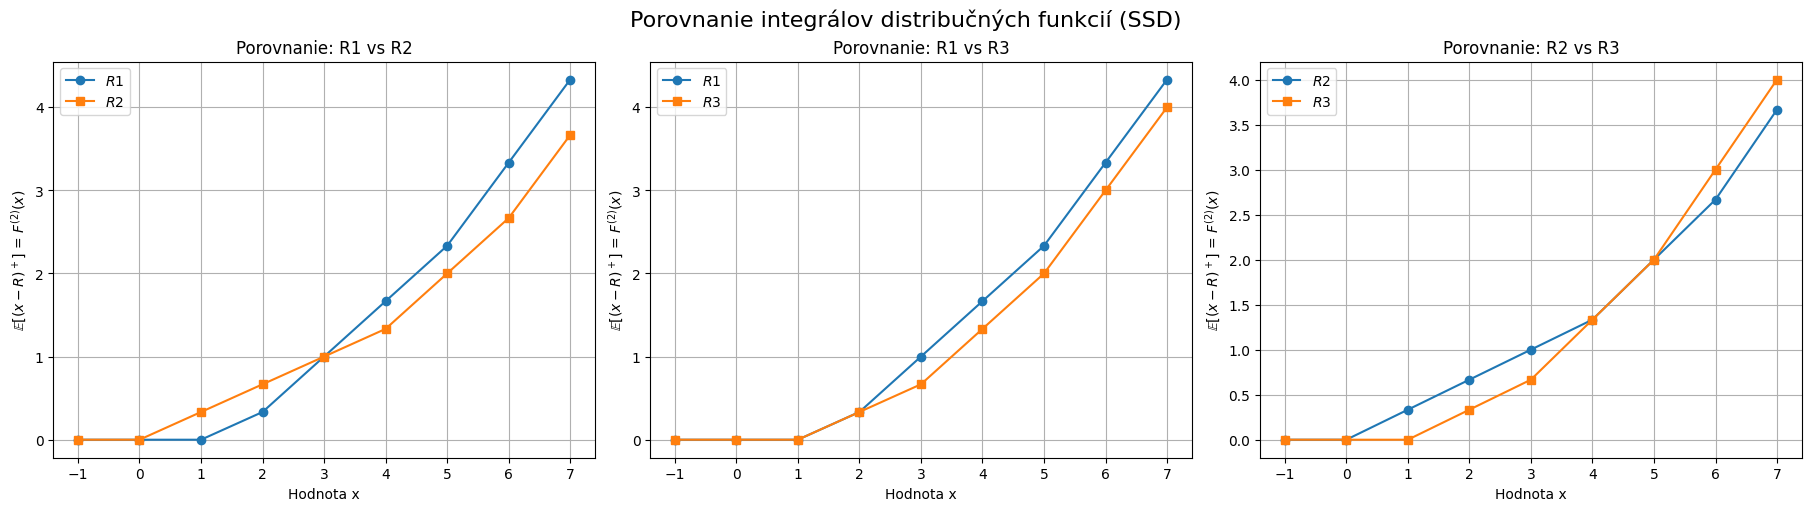

In [ ]:
# Automatické určenie podpornej množiny x podľa výnosov
r1_vynosy = np.array([2, 1, 5])
r2_vynosy = np.array([0, 6, 4])
r3_vynosy = np.array([1, 3, 5])
vsetky_vynosy = np.concatenate([r1_vynosy, r2_vynosy, r3_vynosy])
x_hodnoty = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)

# Pravdepodobnosti realizácií
r1_pravd = np.array([1/3, 1/3, 1/3])
r2_pravd = np.array([1/3, 1/3, 1/3])
r3_pravd = np.array([1/3, 1/3, 1/3])

# Funkcia na výpočet SSD distribučnej funkcie F^{(2)}(x)
def vypocitaj_ssd(x_hodnoty, vynosy, pravdepodobnosti):
    return [sum((x - v if x > v else 0) * p for v, p in zip(vynosy, pravdepodobnosti)) for x in x_hodnoty]

# Funkcia na vykreslenie porovnania medzi dvoma akciami
def vykresli_porovnanie(x_hodnoty, data1, pravd1, data2, pravd2, ozn1, ozn2, ax):
    f2_1 = vypocitaj_ssd(x_hodnoty, data1, pravd1)
    f2_2 = vypocitaj_ssd(x_hodnoty, data2, pravd2)

    ax.plot(x_hodnoty, f2_1, marker='o', label=rf"${ozn1}$")
    ax.plot(x_hodnoty, f2_2, marker='s', label=rf"${ozn2}$")
    ax.set_title(f"Porovnanie: {ozn1} vs {ozn2}")
    ax.set_xlabel("Hodnota x")
    ax.set_ylabel(r"$\mathbb{E}[(x - R)^+]$ = $F^{(2)}(x)$")
    ax.grid(True)
    ax.legend()

# Príprava grafov pre všetky trojice porovnaní
fig, osy = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# R1 vs R2
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r2_vynosy, r2_pravd, 'R1', 'R2', osy[0])

# R1 vs R3
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r3_vynosy, r3_pravd, 'R1', 'R3', osy[1])

# R2 vs R3
vykresli_porovnanie(x_hodnoty, r2_vynosy, r2_pravd, r3_vynosy, r3_pravd, 'R2', 'R3', osy[2])


plt.suptitle("Porovnanie integrálov distribučných funkcií (SSD)", fontsize=16)
plt.show()


## Analýza FSD a SSD medzi $R_1$, $R_2$ a $R_3$ (s nerovnomernými pravdepodobnosťami)

Uvažujeme tri aktíva s nasledovnými výnosmi a pravdepodobnosťami:

- $R_1 = \{2,\ 1,\ 5\}$ s pravdepodobnosťami $[0.5,\ 0.25,\ 0.25]$
- $R_2 = \{0,\ 6,\ 4\}$ s pravdepodobnosťami $[0.5,\ 0.25,\ 0.25]$
- $R_3 = \{1,\ 3,\ 5\}$ s pravdepodobnosťami $[0.5,\ 0.25,\ 0.25]$

---


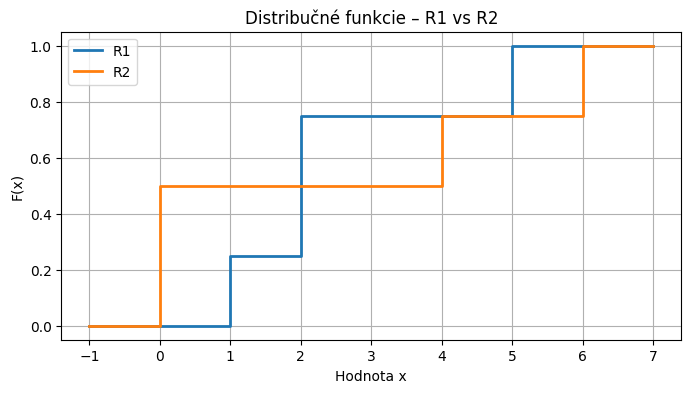

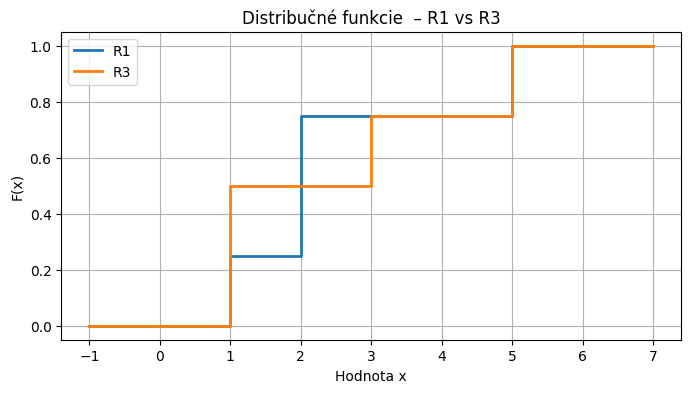

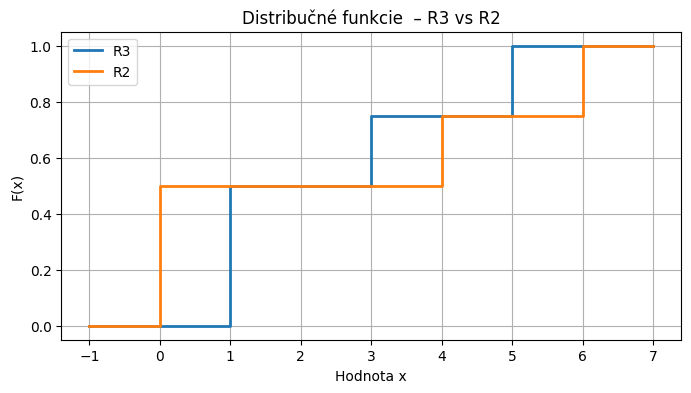

In [ ]:
# Výnosy a pravdepodobnosti pre R1, R2, R3
r1_vynosy = [2, 1, 5]
r1_pravd = [0.5, 0.25, 0.25]

r2_vynosy = [0, 6, 4]
r2_pravd = [0.5, 0.25, 0.25]

r3_vynosy = [1, 3, 5]
r3_pravd = [0.5, 0.25, 0.25]

# Hodnoty osí x (pre ktoré počítame CDF)
vsetky_vynosy = np.array(r1_vynosy + r2_vynosy + r3_vynosy)
hodnoty_x = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)
# Funkcia na výpočet  distribučnej funkcie (CDF)
def vypocitaj_cdf(x_hodnoty, vynosy, pravdepodobnosti):
    cdf = []
    for x in x_hodnoty:
        cdf_hodnota = sum(p for v, p in zip(vynosy, pravdepodobnosti) if v <= x)
        cdf.append(cdf_hodnota)
    return cdf

# Výpočet CDF pre všetky aktíva
cdf_r1 = vypocitaj_cdf(hodnoty_x, r1_vynosy, r1_pravd)
cdf_r2 = vypocitaj_cdf(hodnoty_x, r2_vynosy, r2_pravd)
cdf_r3 = vypocitaj_cdf(hodnoty_x, r3_vynosy, r3_pravd)

# Graf: R1 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='R1', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='R2', linewidth=2)
plt.title("Distribučné funkcie – R1 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R1 vs R3
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r1, where='post', label='R1', linewidth=2)
plt.step(hodnoty_x, cdf_r3, where='post', label='R3', linewidth=2)
plt.title("Distribučné funkcie  – R1 vs R3")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Graf: R3 vs R2
plt.figure(figsize=(8, 4))
plt.step(hodnoty_x, cdf_r3, where='post', label='R3', linewidth=2)
plt.step(hodnoty_x, cdf_r2, where='post', label='R2', linewidth=2)
plt.title("Distribučné funkcie  – R3 vs R2")
plt.xlabel("Hodnota x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()


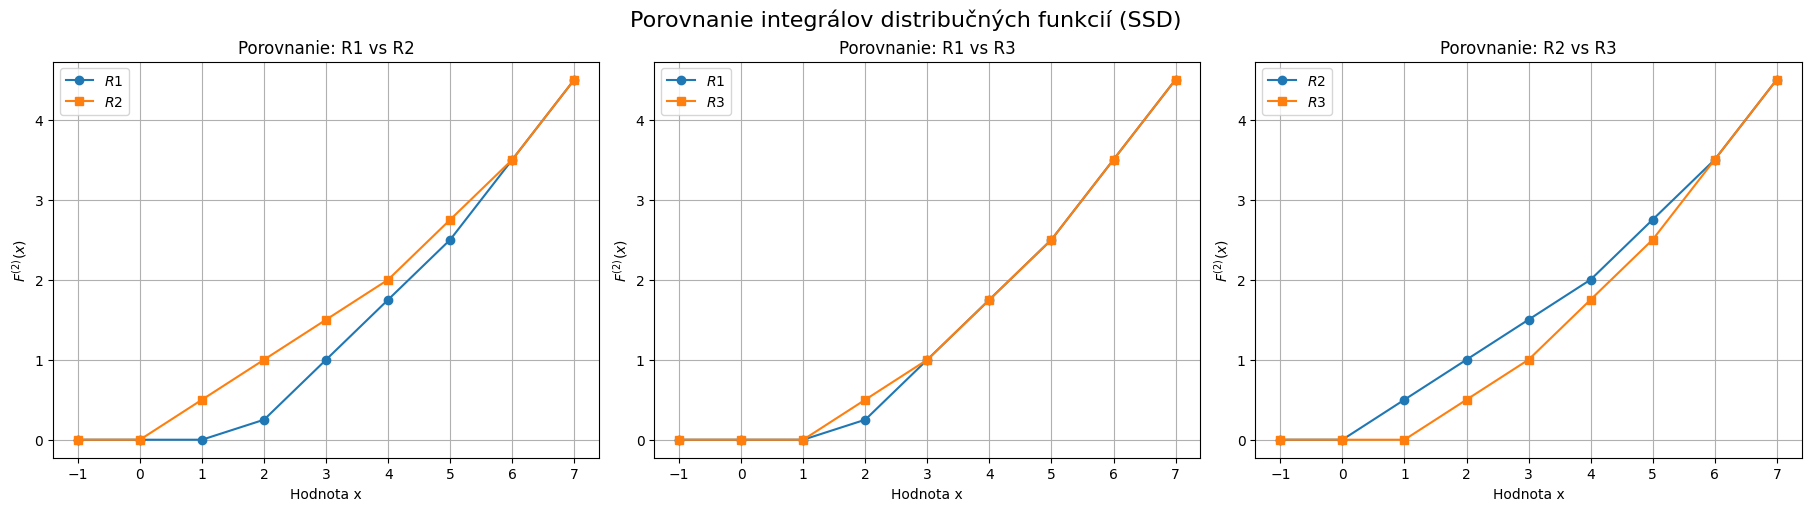

In [ ]:
# Automatické určenie podpornej množiny x podľa výnosov
r1_vynosy = np.array([2, 1, 5])
r2_vynosy = np.array([0, 6, 4])
r3_vynosy = np.array([1, 3, 5])
vsetky_vynosy = np.concatenate([r1_vynosy, r2_vynosy, r3_vynosy])
x_hodnoty = np.arange(vsetky_vynosy.min() - 1, vsetky_vynosy.max() + 2)

# Pravdepodobnosti realizácií
r1_pravd = np.array([0.5, 0.25, 0.25])
r2_pravd = np.array([0.5, 0.25, 0.25])
r3_pravd = np.array([0.5, 0.25, 0.25])

# Funkcia na výpočet SSD distribučnej funkcie F^{(2)}(x)
def vypocitaj_ssd(x_hodnoty, vynosy, pravdepodobnosti):
    return [sum((x - v if x > v else 0) * p for v, p in zip(vynosy, pravdepodobnosti)) for x in x_hodnoty]

# Funkcia na vykreslenie porovnania medzi dvoma akciami
def vykresli_porovnanie(x_hodnoty, data1, pravd1, data2, pravd2, ozn1, ozn2, ax):
    f2_1 = vypocitaj_ssd(x_hodnoty, data1, pravd1)
    f2_2 = vypocitaj_ssd(x_hodnoty, data2, pravd2)

    ax.plot(x_hodnoty, f2_1, marker='o', label=rf"${ozn1}$")
    ax.plot(x_hodnoty, f2_2, marker='s', label=rf"${ozn2}$")
    ax.set_title(f"Porovnanie: {ozn1} vs {ozn2}")
    ax.set_xlabel("Hodnota x")
    ax.set_ylabel(r"$F^{(2)}(x)$")
    ax.grid(True)
    ax.legend()


# Príprava grafov pre všetky trojice porovnaní
fig, osy = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# R1 vs R2
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r2_vynosy, r2_pravd, 'R1', 'R2', osy[0])

# R1 vs R3
vykresli_porovnanie(x_hodnoty, r1_vynosy, r1_pravd, r3_vynosy, r3_pravd, 'R1', 'R3', osy[1])

# R2 vs R3
vykresli_porovnanie(x_hodnoty, r2_vynosy, r2_pravd, r3_vynosy, r3_pravd, 'R2', 'R3', osy[2])

plt.suptitle("Porovnanie integrálov distribučných funkcií (SSD)", fontsize=16)
plt.show()


###  FSD: Prvá stochastická dominancia

Porovnávali sme distribučné funkcie $F_{R_i}(x)$ medzi všetkými dvojicami $(R_1, R_2, R_3)$.

#### Pozorovania z grafov CDF:

- **R₁ vs R₂**: krivky sa pretínajú
- **R₁ vs R₃**: krivky sa pretínajú
- **R₂ vs R₃**: krivky sa pretínajú

 **Záver**: Žiadna distribučná funkcia nie je pre všetky $x$ vyššia ako iná.  
 Preto neexistuje žiadna FSD  medzi $R_1$, $R_2$ a $R_3$.

---

##  Výsledky SSD dominancie podľa grafov

Na základe porovnania funkcií $ F^{(2)}_{R_i}(x) = \mathbb{E}[(x - R_i)^+]  $vidíme:

---

### Porovnania:

- **R₁ vs R₂**  
$ F^{(2)}_{R_1}(x) \leq F^{(2)}_{R_2}(x) $ pre všetky  x \, s aspoň jednou prísnou nerovnosťou  
   → **R₁ stochasticky (SSD) dominuje R₂**

- **R₁ vs R₃**  
$ F^{(2)}_{R_1}(x) \leq F^{(2)}_{R_3}(x) $, s aspoň jednou prísnou nerovnosťou  
   → **R₁ stochasticky (SSD) dominuje R₃**

- **R₃ vs R₂**  
$ F^{(2)}_{R_3}(x) \leq F^{(2)}_{R_2}(x) $, s aspoň jednou prísnou nerovnosťou  
   → **R₃ stochasticky (SSD) dominuje R₂**

---

###  Záver:

$
\textbf{R₂} \prec_{SSD} \textbf{R₁} \quad\text{a}\quad \textbf{R₃} \prec_{SSD} \textbf{R₁} \quad\text{a}\quad \textbf{R₂} \prec_{SSD} \textbf{R₃}
$
a $\boxed{\{R_1\}}$ — najvýhodnejšie aktívum


***
<a id=example62></a>
## Príklad – Rozhodovanie o stávke

<blockquote>
Zvážme osobu s príjmom $100$ CZK, ktorá zvažuje, či prijať stávku o $10$ CZK na hod férovou mincou.  
Porovnajme tieto dve možnosti z pohľadu prvej a druhej stochastickej dominancie (FSD a SSD).
</blockquote>

### Zadanie:

Máme dve náhodné veličiny:

- **Bez stávky**: istý príjem $100$ CZK  
  $\Rightarrow$ náhodná premenná s realizáciou $100$ s pravdepodobnosťou $1$.

- **So stávkou**:  
  - výhra $+10$ → $110$ CZK  
  - prehra $-10$ → $90$ CZK  
  každá s pravdepodobnosťou $\frac{1}{2}$


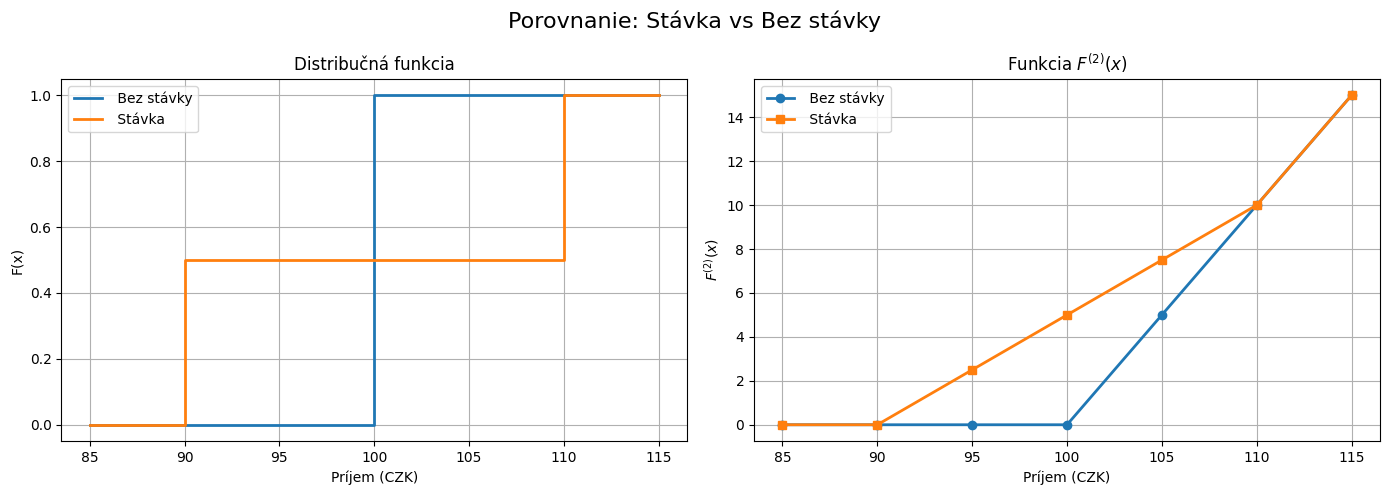

In [ ]:
# Definovanie dvoch náhodných veličín podľa príkladu 6.2
priklady_vynosy = {
    "Bez stávky": [100],           # Náhodna premenná: 100 s pravd. 1
    "Stávka": [90, 110]            # Férový hod mincou: 90 alebo 110 s pravd. 0.5
}
priklady_pravd = {
    "Bez stávky": [1.0],
    "Stávka": [0.5, 0.5]
}

# Hodnoty x, kde vyhodnocujeme
x_hodnoty = list(range(85, 116, 5))

# Výpočet CDF: P(R ≤ x)
def vypocitaj_cdf(x_vals, data, probs):
    return [sum(p for val, p in zip(data, probs) if val <= x) for x in x_vals]

# Výpočet F^{(2)}(x) = E[(x - R)^+]
def vypocitaj_f2(x_vals, data, probs):
    return [sum((x - val if x > val else 0) * p for val, p in zip(data, probs)) for x in x_vals]


# Vykreslenie grafov
fig, osy = plt.subplots(1, 2, figsize=(14, 5))

# Graf CDF
osy[0].step(x_hodnoty, cdf_tabulka.loc["Bez stávky"], where='post', label=" Bez stávky", linewidth=2)
osy[0].step(x_hodnoty, cdf_tabulka.loc["Stávka"], where='post', label=" Stávka", linewidth=2)
osy[0].set_title("Distribučná funkcia")
osy[0].set_xlabel("Príjem (CZK)")
osy[0].set_ylabel("F(x)")
osy[0].grid(True)
osy[0].legend()

# Graf F^{(2)}
osy[1].plot(x_hodnoty, f2_tabulka.loc["Bez stávky"], marker='o', label=" Bez stávky", linewidth=2)
osy[1].plot(x_hodnoty, f2_tabulka.loc["Stávka"], marker='s', label=" Stávka", linewidth=2)
osy[1].set_title("Funkcia $F^{(2)}(x)$")
osy[1].set_xlabel("Príjem (CZK)")
osy[1].set_ylabel(r"$F^{(2)}(x)$")
osy[1].grid(True)
osy[1].legend()

plt.suptitle("Porovnanie: Stávka vs Bez stávky", fontsize=16)
plt.tight_layout()
plt.show()


---

<a id="example62-analysis"></a>
## Rozhodovanie o stávke

---

### Situácia:

Osoba má **istý príjem 100 CZK**.

Rozhoduje sa, či:

- **Zostane pri 100 CZK** (bez rizika)
- **Prijme stávku** – hodí si férovou mincou:
  - ak **vyhrá** → získa 10 CZK → príjem = **110 CZK**
  - ak **prehre** → stratí 10 CZK → príjem = **90 CZK**

---

### Pravdepodobnostné rozdelenia

| Možnosť        | Výnosy          | Pravdepodobnosti        |
|----------------|------------------|--------------------------|
| **Bez stávky** | 100 CZK          | 1 (istota)               |
| **Stávka**     | 90 CZK, 110 CZK  | 0.5, 0.5 (férová minca)  |

---


### Prvá stochastická dominancia (FSD)

Porovnávame CDF (distribučné funkcie):

$$
F_{\text{Bez stávky}}(x) \leq F_{\text{Stávka}}(x) \quad \text{pre všetky } x
$$

**Neplatí** – grafy distribučných funkcií sa pretínajú**.  
To znamenáže žiadna možnosť nedominuje podľa FSD.

---

### Druhá stochastická dominancia (SSD)

Porovnávame:

$$
F^{(2)}_{\text{Bez stávky}}(x) \geq F^{(2)}_{\text{Stávka}}(x) \quad \text{pre všetky } x,\ \text{pričom aspoň pre jedno } x \text{ prísna nerovnosť}
$$

---

## Záver a interpretácia

- **Rizikovo neutrálna osoba**: obe možnosti sú ekvivalentné
- **Rizikovo averzná osoba**: **bez stávky je lepšia voľba**.
  - Má **nižší očakávaný výpadok príjmu**
  - Je **SSD-dominantná** – preferovaná pri averzii voči riziku.

---
